#### Pridicting Heart Disease by using Neural Networks.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data 
2. Create Training and Testing Datasets
3. Building and Training the Neural Network
4. Improving Results - A Binary Classification Problem
5. Results and Metrics


#### To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
# Load the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
print(df.head())

# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Summary statistics
print("Summary statistics:\n", df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  
Shape of the dataset: (303, 14)
Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Summary statistics:
               age         sex          cp    trestbps        chol         fbs  \
count  303.000000  30

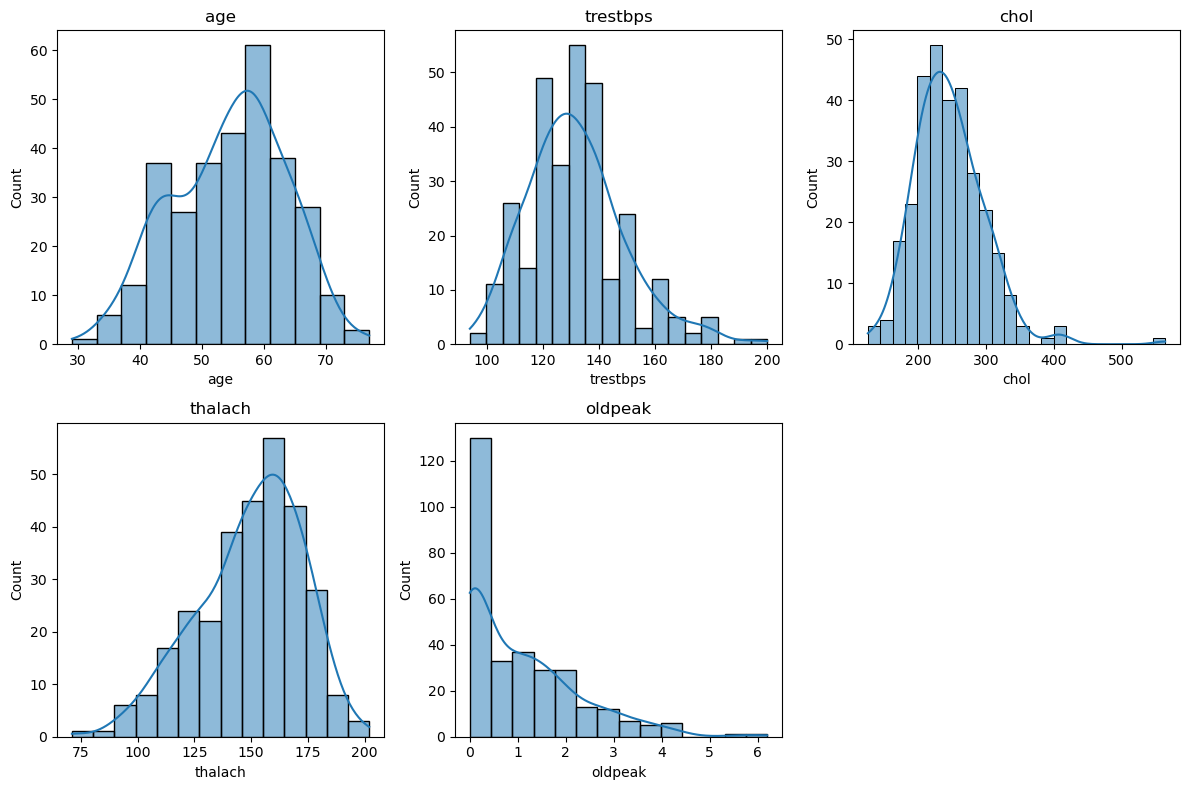

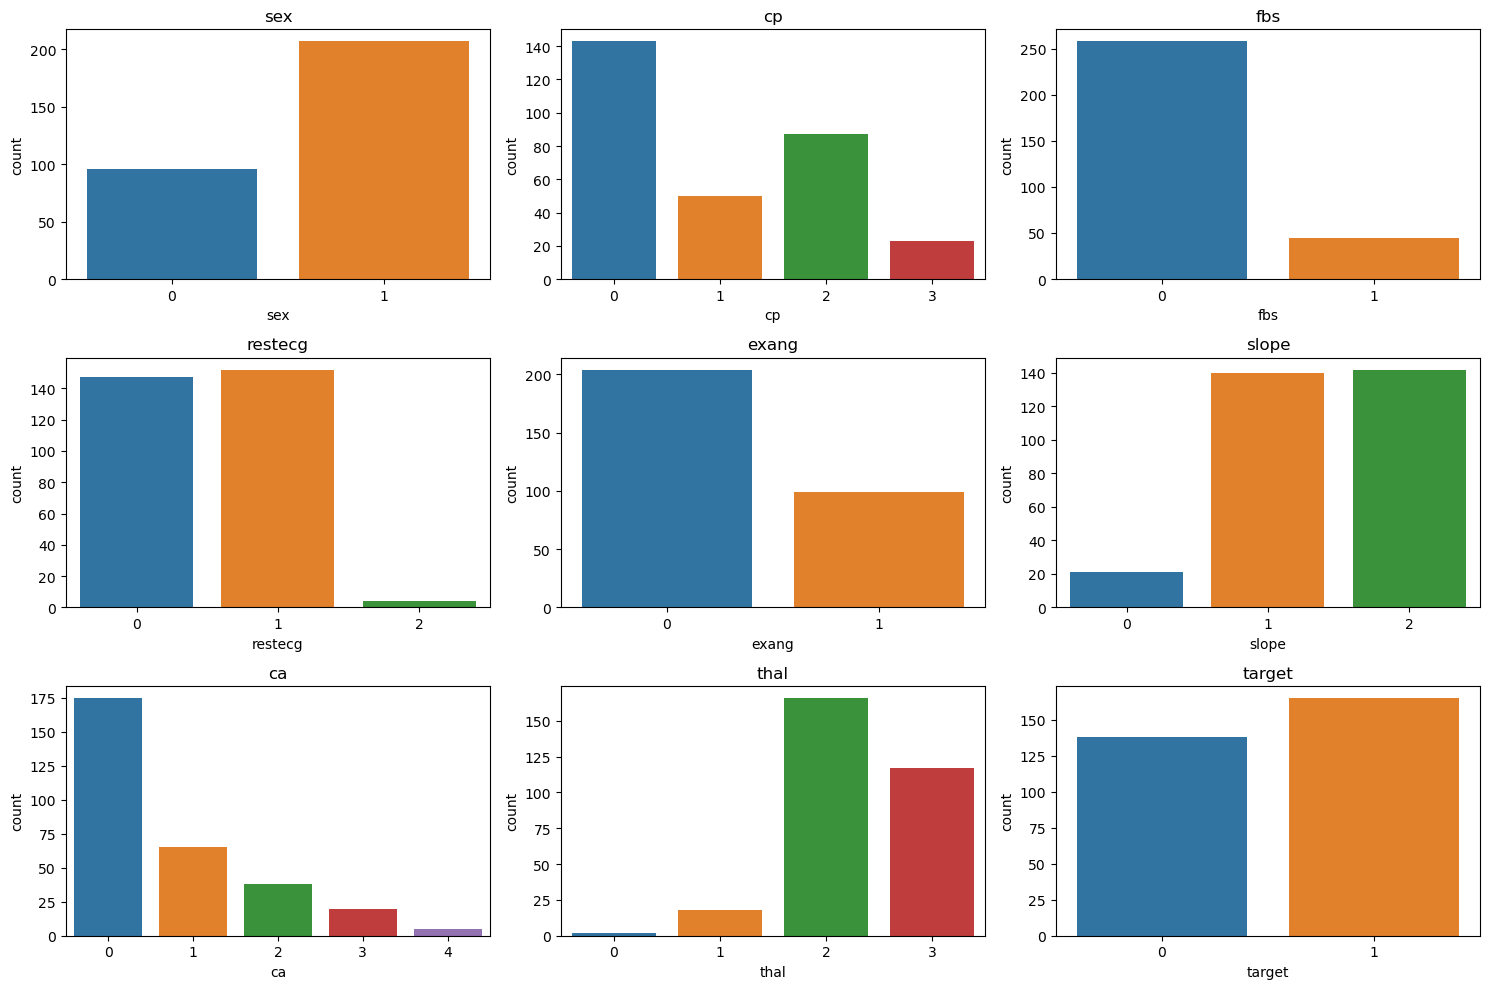

In [18]:

# Visualize the distribution of numerical features
num_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Visualize the distribution of categorical features
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
# Define features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (242, 13) (242,)
Testing set shape: (61, 13) (61,)


In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
# Define the neural network architecture
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


C:\Users\subramanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5486 - loss: 8.7402 - val_accuracy: 0.5918 - val_loss: 6.1304
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5409 - loss: 5.9281 - val_accuracy: 0.6735 - val_loss: 1.7204
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5944 - loss: 2.3676 - val_accuracy: 0.6939 - val_loss: 1.3273
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5911 - loss: 2.0231 - val_accuracy: 0.6735 - val_loss: 1.8827
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5970 - loss: 1.9993 - val_accuracy: 0.7347 - val_loss: 0.8250
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6278 - loss: 0.9791 - val_accuracy: 0.6939 - val_loss: 0.8201
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6211 - loss: 1.0651 - val_accuracy: 0.7551 - val_loss: 0.7218
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5955 - loss: 1.0679 - val_accuracy: 0.7143 - val_loss: 0.7077
Epoch 9/50
7/7 ━━

In [24]:
from tensorflow.keras.layers import Dropout

# Define the neural network architecture with dropout
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Dropout layer with a dropout rate of 0.5 (50%)
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50


C:\Users\subramanya\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4639 - loss: 24.5633 - val_accuracy: 0.6327 - val_loss: 4.3237
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4343 - loss: 25.2640 - val_accuracy: 0.5714 - val_loss: 11.4060
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5165 - loss: 17.5026 - val_accuracy: 0.5714 - val_loss: 12.8401
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5151 - loss: 15.5916 - val_accuracy: 0.5714 - val_loss: 11.5664
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4988 - loss: 17.8350 - val_accuracy: 0.5714 - val_loss: 10.5031
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5152 - loss: 12.4231 - val_accuracy: 0.5714 - val_loss: 9.1010
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5429 - loss: 10.8776 - val_accuracy: 0.5714 - val_loss: 7.3143
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5257 - loss: 10.1700 - val_accuracy: 0.5714 - val_loss: 5.3196
Epoc

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [26]:
# Evaluate the model on the testing dataset
y_pred = model.predict(X_test)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_binary)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred_binary)
print("Classification Report:\n", class_report)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Accuracy: 0.5245901639344263
Confusion Matrix:
 [[ 1 28]
 [ 1 31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        29
           1       0.53      0.97      0.68        32

    accuracy                           0.52        61
   macro avg       0.51      0.50      0.37        61
weighted avg       0.51      0.52      0.39        61

